<a href="https://colab.research.google.com/github/momopmkr/momo/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_04_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91%ED%95%98%EA%B8%B0_%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 4. 웹 크롤링으로 데이터 수집

---------------------

### 01.웹 크롤링의 이해
- **웹 크롤링(Web Crawling)**: 웹 페이지로부터 원하는 정보를 추출하는 기법, 보통 여러 페이지 탐색하는 방법,
- **웹 스크래핑(Web Scraping)**: 특정한 하나의 웹 페이지를 탐색하는 방법
- **웹 크롤링과 웹 스크래핑의  방법이 동일하여 보통 웹 크롤링이라고 통칭해서 부른다.**

### 라이브러리 설치하기

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,659 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120829 files and dire

In [1]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

In [2]:
# HTML과 XML 문서를 파싱하기 위한 파이썬 패키지
!pip install beautifulsoup4

In [3]:
# 동적 크롤링을 위한 셀레니움 설치
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00


### 라이브러리 확인하기

In [4]:
import requests

requests.get("https://www.naver.com") #ok 200

<Response [200]>

In [5]:
import requests

response = requests.get("https://google.com")

# 응답 상태
#print('#응답 상태: ', response.status_code)

# 응답 바이너리 원문
# print('#응답 바이너리 원문: ', response.content)

# 응답 UTF-8로 인코딩된 문자열
# print('#응답 UTF-8로 인코딩된 문자열: ', response.text)

# 응답 헤더
print('#응답 헤더: ', response.headers)

# # 응답 헤더: 콘텐트 유형
# print('#응답 헤더유형: ', response.headers['Content-Type'])

#응답 헤더:  {'Date': 'Fri, 01 Sep 2023 06:28:13 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-g9Zag8oQwAIK1ldVgLO2TA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-09-01-06; expires=Sun, 01-Oct-2023 06:28:13 GMT; path=/; domain=.google.com; Secure, AEC=Ad49MVGq_vyEYlC3kr_Lu66B1Xj_-jmBsAn3E1QVDmSSQBpV355FBifbww; expires=Wed, 28-Feb-2024 06:28:13 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=BCUtNPuftFaTTri2mbviizWt5VWaPK5qBUh_WXtP3sxtQ2wBBMwWkQ5S9MTCTrfvmlxtsrHc2nSB8UKYsK4sREiUtXtSznzJGd9GfXiCzFTLcGFoyBMx2vgWczPImyiBok7lfzCG

-------------------------------

## 02.정적 크롤링(스크래핑)

### [실습] 네이버 뉴스 검색 데이터 수집하기
단, 네이버에서는 한번에 90개까지만 수집 가능한 상태임 <br>
- **1.데이터 가져올 웹페이지**: 네이버 뉴스검색(검색어:우영우) https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%9A%B0%EC%98%81%EC%9A%B0
- **2.가져올 정보**: 기사제목, URL
- **3.DataFrame으로 만들기**
- **4.DataFrame --> csv파일로 만들기**

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

print('-'*50)
print("#네이버 뉴스 데이터 크롤링하기...")
print('-'*50)

# 검색 URL 지정하기
# query=검색어, start=페이지 (10건씩 추출)
news_url = 'https://search.naver.com/search.naver?where=news&query={}&start='

# 검색어 직접 입력 받기
keyword = input('검색 키워드를 입력하세요 : ')
query = keyword.replace(' ', '+') # 검색에서 공백문자를 +로 대체해 사용하도록 적용
#print(f'query')

def get_naverNewsTitle(total=100, start_cnt=1):

    # 1.웹 데이터 수집하기
    titles, urls= [],[]     # 제목=[], url=[] 데이터담기
    while True:

        # 웹 페이지 요청하기
        #print(f'요청 query: news_url.format(query) + str(start_cnt)')
        response = requests.get(news_url.format(query) + str(start_cnt)) #문자열+문자열은 딱 붙어서 나온다


        # 2.응답 결과 파싱하기(제목, url 추출하기)
        soup = BeautifulSoup(response.text, 'html.parser')
#         page_tags   = soup.select('ul.list_news > li > div > div > a')
        page_tags   = soup.select('div.news_area > a')
       # print(f'page_tags')
        page_titles = list(map(lambda tag: tag.get('title'), page_tags))
        page_urls   = list(map(lambda tag: tag.get('href'), page_tags))

        # 목적 개수만큼 추출하기
        if len(page_titles) <= 0:
            break
        elif start_cnt >= total:
            break
        else:
            titles += page_titles
            urls += page_urls
            start_cnt += len(page_titles)

        # 데이터 수집 진행률 표시
        print(f"{int( start_cnt-1/total*100 ) }% ", end="")

    print()
    print(f"검색어[{keyword}] 로 검색된 뉴스 [{len(titles)}]건 가져오기 완료!")
    print('-'*50)

    # 3.titles, urls 2차원 리스트로 만들어 DataFrame으로 만든다.
    datas = [[t, u] for t, u in zip(titles, urls)]
    df = pd.DataFrame(datas, columns=['title','url'])
    return df

df = get_naverNewsTitle(100, 1)
df

# 4.파일로 저장하기
file = f"./sample_data/naver_news_{keyword}_title.csv"
news_df = df['title']
news_df.to_csv(file, index=False, encoding="utf-8-sig")
df

--------------------------------------------------
#네이버 뉴스 데이터 크롤링하기...
--------------------------------------------------
검색 키워드를 입력하세요 : 무빙
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
검색어[무빙] 로 검색된 뉴스 [100]건 가져오기 완료!
--------------------------------------------------


,title,url
0,‘무빙’ 전세계가 반했다,https://www.mk.co.kr/article/10820022
1,"'무빙' 한효주, 눈빛만으로 시청자 쥐락펴락..오감 충족 열연",https://www.starnewskorea.com/stview.php?no=20...
2,"조인성 ""'무빙', 오랜만에 멜로 촬영…♥한효주가 잘해줘"" (크로스인터뷰)",https://www.xportsnews.com/article/1765566
3,"'무빙' 블랙팀 해체…류승룡, 의문의 초능력자 만났다 '후반부 서사 예고'",https://www.spotvnews.co.kr/news/articleView.h...
4,'밀수' 이어 '무빙'까지…K콘텐트 전성시대,https://news.jtbc.co.kr/article/article.aspx?n...
...,...,...
95,"'무빙' 강풀 작가 ""히어로의 능력은 '공감'…착한 이야기하고파"" [N인터뷰]③",https://www.news1.kr/articles/5152925
96,"'무빙' 선공개, 분유 타고 초능력 안 쓰는 조인성…12-13화 공개 시간은?",http://www.topstarnews.net/news/articleView.ht...
97,"'무빙' 김도훈 ""예고 자퇴 결심했는데...끼쟁이 너무 많아"" (가요광장)[종합]",https://www.xportsnews.com/article/1764921
98,"""이렇게 멋진 야외상영은 처음""… '팝업 시네마: 무안 무빙' 대성료",http://starin.edaily.co.kr/news/newspath.asp?n...


### [실습] (수집된 데이터)기사 제목의 단어(토큰) 빈도수 분석하기
- ** CountVectorizer 클래스 사용 : 단어 빈도수 추출**
- **단, 한글에서 불용어 처리 및 가중치 처리 등 자연어 텍스트 전처리에 필요한 여러 가지 방법은 여기서 다루지 않는다.**

In [10]:
!pip install scikit-learn

In [11]:
import sklearn
sklearn.__version__

'1.2.2'

[('무빙', 95), ('강풀', 13), ('디즈니', 11), ('조인성', 11), ('고윤정', 8), ('작가', 7), ('1위', 7), ('인터뷰', 7), ('한효주', 7), ('마스크걸', 5)]


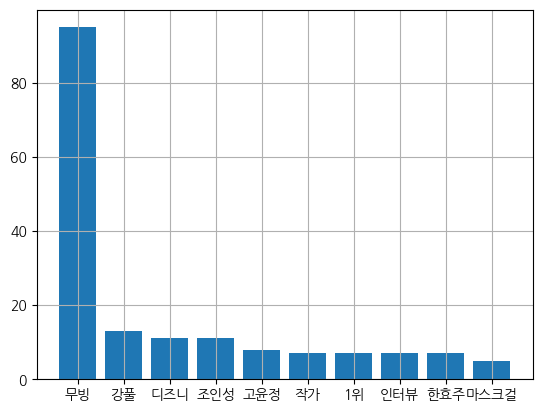

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', family='NanumGothic') # 윈도우용 폰트-코랩용은 해당폰트 지정

def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 기사제목을 토큰화
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    #plt.savefig(f'image/{keyword}_bar_graph.png')


# 기사제목을 말뭉치로 사용
corpus = df['title'].to_list()
# print(corpus)

# 기사제목을 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 단어(토큰) 빈도 수_Bar그래프 그리기 : 상위 10개
draw_wordTokenCountGraph(feature_name[:10], count[:10])


### [실습] (수집된 데이터)기사 제목의 토큰 빈도수 워드클라우드로 시각화
- 워드클라우드 입력데이터 : 딕셔너리 타입

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
# font_path = 'malgun'  # C:/Windows/Fonts/
font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(feature_name, count))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file(f'./sample_data/{keyword}_워드클라우드.png')

OSError: ignored

### [실습] (수집된 데이터)기사 제목의 토큰 빈도수 출력하기

In [15]:
data = dict(zip(feature_name, count))
token_df = pd.DataFrame(data, index=[1])
token_df

# token_df.to_csv('data/token.csv', index=False, encoding="utf-8-sig")

,무빙,강풀,디즈니,조인성,고윤정,작가,1위,인터뷰,한효주,마스크걸,...,먹힌,맹활약,매출도,매력,망할까봐,말이,말에,많아,만큼,히어로의
1,95,13,11,11,8,7,7,7,7,5,...,1,1,1,1,1,1,1,1,1,1


-----

## 03.동적 크롤링(PC에서 실행)

- https://chromedriver.chromium.org/
- 최신 chrome webdriver 다운로드
- 해당 위치에 WebDriver폴더 만들고 exe파일 옮겨놓는다.
-  (C:/python/projectmanager/WebDriver/chromedriver.exe)
- 자신의 크롬 웹 브라우저의 버전을 확인하고 버전에 맞는 것을 다운로드해야한다.

#### # webdriver 동작 테스트하기
- 자신의 크롬 웹 브라우저의 버전을 확인하고 버전에 맞는 것을 다운로드해야한다. 그렇지 않으면 오류가 발생한다.
- 아래 코드를 실행시키면 크롬 브라우져가 잠깐 실행되었다 닫힌다.

In [ ]:
from selenium import webdriver

# chromedriver.exe 파일이 있는 경로
driver = './WebDriver/chromedriver.exe'
wd = webdriver.Chrome(driver)

wd.get('https://www.naver.com/')

wd.close()  # 브라우저가 실행되었다가 자동으로 닫힌다.

### [실습]  커피빈매장 정보 크롤링하여 파일로 저장하기

- 아래 사이트를 이용해 호출해야할 자바스크립트 함수를 확인하다.
- https://www.coffeebeankorea.com
- https://www.coffeebeankorea.com/store/store.asp
- (매장 번호로) 자세히보기: javascript:storePop2('374');

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

from selenium import webdriver
import time

MAX = 10     # 추출 데이터 건수

#[매장 추출 함수]
def getStoreInfo():
    CoffeeBean_URL = "https://www.coffeebeankorea.com/store/store.asp"
    wd = webdriver.Chrome('./WebDriver/chromedriver.exe')

    result = []  # 데이터 저장 변수
    total, cnt = 370, 0
    for i in range(1, total+1):  #매장 수 만큼(370) 반복
        wd.get(CoffeeBean_URL)
        time.sleep(1)  #웹페이지 연결할 동안 1초 대기
        try:
            wd.execute_script("storePop2(%d)" %i)
            time.sleep(1) #스크립트 실행 할 동안 1초 대기

            html = wd.page_source
            soupCB = BeautifulSoup(html, 'html.parser')
            store_name_h2 = soupCB.select("div.store_txt > h2")
            store_name = store_name_h2[0].string  #매장 이름

            store_info = soupCB.select("div.store_txt > table.store_table > tbody > tr > td")
            store_address_list = list(store_info[2])
            store_address = store_address_list[0]  #매장 주소

            store_phone = store_info[3].string     #매장 전화번호
            result.append([store_name]+[store_address]+[store_phone])
            cnt += 1
            # 매장정보 가져온 데이터 출력하기
            print("[%3d] %3d - %s" % (cnt, i, store_name))


             # MAX값에 해당하는 건수 만큼만 실행하기
            if cnt >= MAX:
                break

        except:
            continue

    return result

#---------------
# main
#---------------
print('CoffeeBean store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
result = getStoreInfo()  #[매장 추출 함수]호출하기

df_cb = pd.DataFrame(result, columns=('store', 'address','phone'))
df_cb.head()

In [ ]:
# 파일로 저장하기
file = './data/CoffeeBean_매장정보.csv'
df_cb.to_csv(file, encoding='cp949', mode='w', index=False)

df = pd.read_csv(file, encoding='cp949')
df.head()

--------------

끝